In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from libsvm.svmutil import * 
import time
from sklearn.utils import shuffle
import random
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import cm


In [2]:

data=open('feat_25_prob1.csv',mode='r')
lines_list=data.readlines()
number_of_class=10

In [3]:
# A,B,C,D,E(only 0 and 1 class has been taken) 
# A.	Choose just 2 out of the 10 classes in your data, and train an SVM
# B.	Leave some data aside for validation, or ideally, use cross-validation.
# C.	Study the effects of changing the different hyperparameter values, including the type of kernel function being used.
# D.	How do they affect the accuracy
# E.	Can you distinguish cases of overfitting, underfitting, and good fitting?
matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix[0:600]
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
row_11=[row[10] for row in matrix]
row_12=[row[11] for row in matrix]
row_13=[row[12] for row in matrix]
row_14=[row[13] for row in matrix]
row_15=[row[14] for row in matrix]
row_16=[row[15] for row in matrix]
row_17=[row[16] for row in matrix]
row_18=[row[17] for row in matrix]
row_19=[row[18] for row in matrix]
row_20=[row[19] for row in matrix]
row_21=[row[20] for row in matrix]
row_22=[row[21] for row in matrix]
row_23=[row[22] for row in matrix]
row_24=[row[23] for row in matrix]
row_25=[row[24] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        r.append(row[10])
        r.append(row[11])
        r.append(row[12])
        r.append(row[13])
        r.append(row[14])
        r.append(row[15])
        r.append(row[16])
        r.append(row[17])
        r.append(row[18])
        r.append(row[19])
        r.append(row[20])
        r.append(row[21])
        r.append(row[22])
        r.append(row[23])
        r.append(row[24])
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [4]:
Tstart=time.time()

prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
param=svm_parameter('-s 0 -c 1 -t 1 -g 3  -d 2 ')  ## change s and t(('-s 0 -c 1 -t 1 -g 3  -d 2 ') good combination)
model=svm_train(prob,param)
#s---> SVM type
#d---> degree
#t--->kernal type
#c--->margin type(soft/hard
#g---> gamma in kernal funtion
Tend=time.time()
print('Time to Train(ms)=',(Tend-Tstart)*1000)

Time to Train(ms)= 23.603200912475586


In [5]:
p_label,p_acc,p_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],model)
p_acc

Accuracy = 100% (120/120) (classification)


(100.0, 0.0, 1.0)

In [6]:
confusion_mat=multilabel_confusion_matrix(output[Trainning_instances:Total_instances],p_label)
confusion_mat

##CM=[ TN   FN]
  #  [ FP   TP]    

array([[[63,  0],
        [ 0, 57]],

       [[57,  0],
        [ 0, 63]]], dtype=int64)

In [7]:
report=metrics.confusion_matrix(output[Trainning_instances:Total_instances],p_label)
# sklearn.metrics.confusion_matrix
report
cm_df = pd.DataFrame(report,
                     index = ['0','1'], #,labels=["0", "1", "2","3", "4", "5","6", "7", "8","9"]
                     columns = ['0','1'])
cm_df

,0,1
0,57,0
1,0,63


In [8]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,10):
        for g in range(-8,10):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)


C=-3,gamma=-8,kernaltype=0,degree=1
Accuracy = 100% (480/480) (classification)
Accuracy = 100% (120/120) (classification)
Test accuracy= (100.0, 0.0, 1.0)
C=-3,gamma=-8,kernaltype=0,degree=2
Accuracy = 100% (480/480) (classification)
Accuracy = 100% (120/120) (classification)
Test accuracy= (100.0, 0.0, 1.0)
C=-3,gamma=-8,kernaltype=0,degree=3
Accuracy = 100% (480/480) (classification)
Accuracy = 100% (120/120) (classification)
Test accuracy= (100.0, 0.0, 1.0)
C=-3,gamma=-8,kernaltype=0,degree=4
Accuracy = 100% (480/480) (classification)
Accuracy = 100% (120/120) (classification)
Test accuracy= (100.0, 0.0, 1.0)
C=-3,gamma=-8,kernaltype=1,degree=1
Accuracy = 99.375% (477/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.008333333333333333, 0.9671052631578947)
C=-3,gamma=-8,kernaltype=1,degree=2
Accuracy = 50.625% (243/480) (classification)
Accuracy = 47.5% (57/120) (classification)
Test accuracy= (47.5, 0.525, nan)
C=-3,gamma=-8,k

<function matplotlib.pyplot.show(close=None, block=None)>

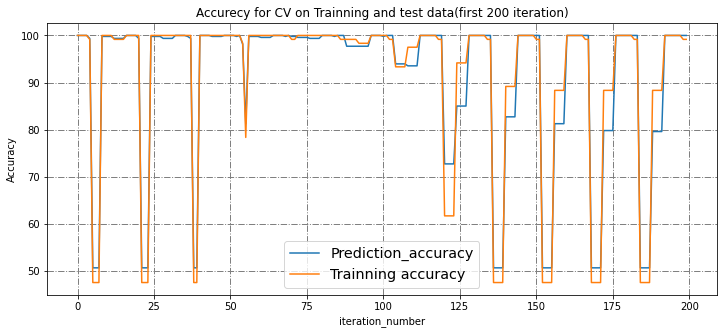

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:200],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:200],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 200 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [10]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

best parameter [0.125, 0.00390625, 0, 1, 100.0]
worst parameter [0.125, 0.00390625, 1, 2, 50.625]
Testing on best parameter
Train accurecy for best parameter
Accuracy = 100% (480/480) (classification)
Test accurecy for best parameter
Accuracy = 100% (120/120) (classification)
Testing on worst parameter
Train accurecy for worst parameter
Accuracy = 50.625% (243/480) (classification)
Test accurecy for worst parameter
Accuracy = 47.5% (57/120) (classification)
Time to Train(sec)= 128662.21070289612


In [11]:
# M.	Also try using only the first 10 features, instead of all 25, and compare the results in the two cases(classes o and 1 taken)

matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix[0:600]
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
row_11=[row[10] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [12]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,10):
        for g in range(-8,10):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)

C=-3,gamma=-8,kernaltype=0,degree=1
Accuracy = 99.7917% (479/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.008333333333333333, 0.9671951886276654)
C=-3,gamma=-8,kernaltype=0,degree=2
Accuracy = 99.7917% (479/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.008333333333333333, 0.9671951886276654)
C=-3,gamma=-8,kernaltype=0,degree=3
Accuracy = 99.7917% (479/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.008333333333333333, 0.9671951886276654)
C=-3,gamma=-8,kernaltype=0,degree=4
Accuracy = 99.7917% (479/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.008333333333333333, 0.9671951886276654)
C=-3,gamma=-8,kernaltype=1,degree=1
Accuracy = 99.1667% (476/480) (classification)
Accuracy = 99.1667% (119/120) (classification)
Test accuracy= (99.16666666666667, 0.00833

<function matplotlib.pyplot.show(close=None, block=None)>

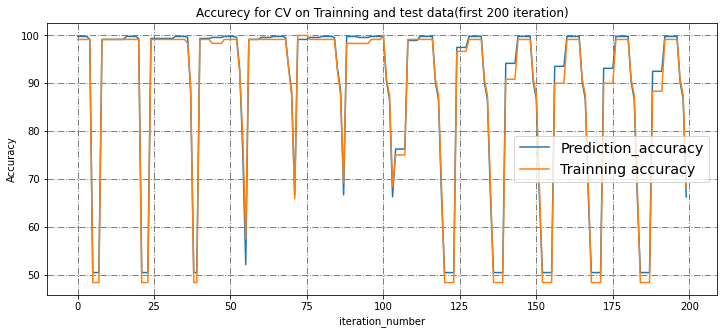

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:200],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:200],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 200 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [14]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

best parameter [0.125, 0.00390625, 0, 1, 99.79166666666667]
worst parameter [0.125, 0.00390625, 1, 2, 50.416666666666664]
Testing on best parameter
Train accurecy for best parameter
Accuracy = 99.7917% (479/480) (classification)
Test accurecy for best parameter
Accuracy = 99.1667% (119/120) (classification)
Testing on worst parameter
Train accurecy for worst parameter
Accuracy = 50.4167% (242/480) (classification)
Test accurecy for worst parameter
Accuracy = 48.3333% (58/120) (classification)
Time to Train(sec)= 94599.27773475647


In [25]:
# G.	Repeat this exercise for at least two more pairs of classes out of the 10 given to you.(all the features and taken class 2 and 3 now)

matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix[600:1200]
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
row_11=[row[10] for row in matrix]
row_12=[row[11] for row in matrix]
row_13=[row[12] for row in matrix]
row_14=[row[13] for row in matrix]
row_15=[row[14] for row in matrix]
row_16=[row[15] for row in matrix]
row_17=[row[16] for row in matrix]
row_18=[row[17] for row in matrix]
row_19=[row[18] for row in matrix]
row_20=[row[19] for row in matrix]
row_21=[row[20] for row in matrix]
row_22=[row[21] for row in matrix]
row_23=[row[22] for row in matrix]
row_24=[row[23] for row in matrix]
row_25=[row[24] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        r.append(row[10])
        r.append(row[11])
        r.append(row[12])
        r.append(row[13])
        r.append(row[14])
        r.append(row[15])
        r.append(row[16])
        r.append(row[17])
        r.append(row[18])
        r.append(row[19])
        r.append(row[20])
        r.append(row[21])
        r.append(row[22])
        r.append(row[23])
        r.append(row[24])
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [33]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,5):
        for g in range(-5,5):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)

C=-3,gamma=-5,kernaltype=0,degree=1
Accuracy = 98.3333% (472/480) (classification)
Accuracy = 98.3333% (118/120) (classification)
Test accuracy= (98.33333333333333, 0.016666666666666666, 0.9343724364232978)
C=-3,gamma=-5,kernaltype=0,degree=2
Accuracy = 98.3333% (472/480) (classification)
Accuracy = 98.3333% (118/120) (classification)
Test accuracy= (98.33333333333333, 0.016666666666666666, 0.9343724364232978)
C=-3,gamma=-5,kernaltype=0,degree=3
Accuracy = 98.3333% (472/480) (classification)
Accuracy = 98.3333% (118/120) (classification)
Test accuracy= (98.33333333333333, 0.016666666666666666, 0.9343724364232978)
C=-3,gamma=-5,kernaltype=0,degree=4
Accuracy = 98.3333% (472/480) (classification)
Accuracy = 98.3333% (118/120) (classification)
Test accuracy= (98.33333333333333, 0.016666666666666666, 0.9343724364232978)
C=-3,gamma=-5,kernaltype=1,degree=1
Accuracy = 97.0833% (466/480) (classification)
Accuracy = 98.3333% (118/120) (classification)
Test accuracy= (98.33333333333333, 0.01666

<function matplotlib.pyplot.show(close=None, block=None)>

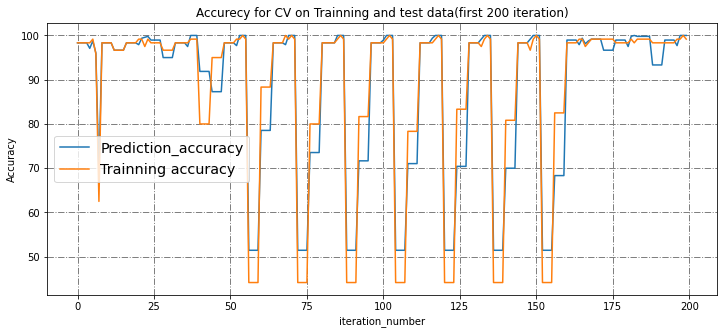

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:200],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:200],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 200 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [35]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

best parameter [0.125, 0.125, 1, 2, 100.0]
worst parameter [0.125, 0.25, 2, 1, 51.45833333333333]
Testing on best parameter
Train accurecy for best parameter
Accuracy = 100% (480/480) (classification)
Test accurecy for best parameter
Accuracy = 99.1667% (119/120) (classification)
Testing on worst parameter
Train accurecy for worst parameter
Accuracy = 51.4583% (247/480) (classification)
Test accurecy for worst parameter
Accuracy = 44.1667% (53/120) (classification)
Time to Train(sec)= 54273.449420928955


In [36]:
#Classes taken are 4 and 5 and 10 featues

matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix[1200:1800]
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
row_3=[row[2] for row in matrix]
row_4=[row[3] for row in matrix]
row_5=[row[4] for row in matrix]
row_6=[row[5] for row in matrix]
row_7=[row[6] for row in matrix]
row_8=[row[7] for row in matrix]
row_9=[row[8] for row in matrix]
row_10=[row[9] for row in matrix]
row_11=[row[10] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])
        r.append(row[2])
        r.append(row[3])
        r.append(row[4])
        r.append(row[5])
        r.append(row[6])
        r.append(row[7])
        r.append(row[8])
        r.append(row[9])
        
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

In [37]:
# Crossvalidation(parameter(c-->penalisation,g-->margins,t-->type of kernel))
prob=svm_problem(output[0:Trainning_instances],x[0:Trainning_instances])
Tstart=time.time()
param=svm_parameter("-q")
results=[]
results_pred=[]
for c in range(-3,10):
        for g in range(-8,10):
                for t in range(0,4):
                        for d in range(1,5):
                                print(f'C={c},gamma={g},kernaltype={t},degree={d}')
                                param.C,param.gamma,param.kernel_type,param.degree =2**c,2**g,t,d## iterating parameters
                                m=svm_train(prob,param)## Trainning model on problem defined above and parameter combination in loop
                                p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)## Accurecy calculation for train data
                                pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)## Accurecy calculation for test data
                                print('Test accuracy=',pred_acc)
                                results.append([param.C,param.gamma,param.kernel_type,param.degree,p_acc[0]])
                                results_pred.append([param.C,param.gamma,param.kernel_type,param.degree,pred_acc[0]])
Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart))
result_df=pd.DataFrame(results)
result_df_pred=pd.DataFrame(results_pred)

C=-3,gamma=-8,kernaltype=0,degree=1
Accuracy = 97.0833% (466/480) (classification)
Accuracy = 96.6667% (116/120) (classification)
Test accuracy= (96.66666666666667, 0.03333333333333333, 0.8748370273794003)
C=-3,gamma=-8,kernaltype=0,degree=2
Accuracy = 97.0833% (466/480) (classification)
Accuracy = 96.6667% (116/120) (classification)
Test accuracy= (96.66666666666667, 0.03333333333333333, 0.8748370273794003)
C=-3,gamma=-8,kernaltype=0,degree=3
Accuracy = 97.0833% (466/480) (classification)
Accuracy = 96.6667% (116/120) (classification)
Test accuracy= (96.66666666666667, 0.03333333333333333, 0.8748370273794003)
C=-3,gamma=-8,kernaltype=0,degree=4
Accuracy = 97.0833% (466/480) (classification)
Accuracy = 96.6667% (116/120) (classification)
Test accuracy= (96.66666666666667, 0.03333333333333333, 0.8748370273794003)
C=-3,gamma=-8,kernaltype=1,degree=1
Accuracy = 60% (288/480) (classification)
Accuracy = 55.8333% (67/120) (classification)
Test accuracy= (55.833333333333336, 0.44166666666666

<function matplotlib.pyplot.show(close=None, block=None)>

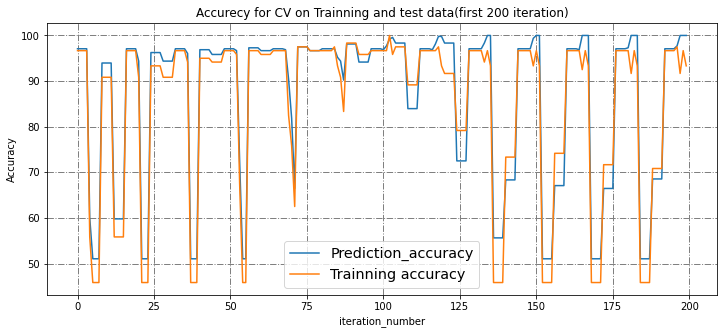

In [38]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(result_df[4][0:200],label='Prediction_accuracy')
plt.plot(result_df_pred[4][0:200],label='Trainning accuracy')
plt.title("Accurecy for CV on Trainning and test data(first 200 iteration)")
plt.xlabel('iteration_number')
plt.ylabel('Accuracy')
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [39]:
# Overfit/underfit/generalfit check

bestIDx=np.argmax(np.array(results)[:,4])
worstIDX=np.argmin(np.array(results)[:,4])
print('best parameter',results[bestIDx])
print('worst parameter',results[worstIDX])
# pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

print('Testing on best parameter')
resultnp=np.array(results)
param.C=resultnp[bestIDx,0]
param.gamma=resultnp[bestIDx,1]
ker=resultnp[bestIDx,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[bestIDx,3])
m=svm_train(prob,param)
print('Train accurecy for best parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for best parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

## giving good results as it is not trainned to predict just one classs

# resultnp=np.array(results)
print('Testing on worst parameter')## worst model is not generalised model as trainn accu>>>test accu as it got overfit
param.C=resultnp[worstIDX,0]
param.gamma=resultnp[worstIDX,1]
ker=resultnp[worstIDX,2]
param.kernel_type=int(ker)
param.degree=int(resultnp[worstIDX,3])
m=svm_train(prob,param)
print('Train accurecy for worst parameter')
p_lbl,p_acc,p_val=svm_predict(output[0:Trainning_instances],x[0:Trainning_instances],m)
print('Test accurecy for worst parameter')
pred_lbl,pred_acc,pred_val=svm_predict(output[Trainning_instances:Total_instances],x[Trainning_instances:Total_instances],m)

Tend=time.time()
print('Time to Train(sec)=',(Tend-Tstart)*1000)

# Under fit as well as so useless only predicting 0
## check by running in different cell as output get overwrite.

best parameter [0.125, 1.0, 1, 3, 100.0]
worst parameter [0.125, 0.00390625, 1, 2, 51.041666666666664]
Testing on best parameter
Train accurecy for best parameter
Accuracy = 100% (480/480) (classification)
Test accurecy for best parameter
Accuracy = 96.6667% (116/120) (classification)
Testing on worst parameter
Train accurecy for worst parameter
Accuracy = 51.0417% (245/480) (classification)
Test accurecy for worst parameter
Accuracy = 45.8333% (55/120) (classification)
Time to Train(sec)= 605990.9734725952


In [40]:
# H.	Try visualising your data using just the first 2 features. Does this help you get some sense of
#  which pairs of classes are harder to distinguish between, or which specific data points tend to be misclassified?
matrix=[]
for line in lines_list:
        row=[]
        for val in line.split(','):
                var =float(val)
                row.append(var)
        matrix.append(row)
data.close()
matrix=matrix
matrix=shuffle(matrix)
matrix_rows=len(matrix)
matrix_cols=len(matrix[0])

row_1=[row[0] for row in matrix]
row_2=[row[1] for row in matrix]
output=[row[25] for row in matrix]


x=[]
for row in matrix:
        r=[]
        r.append(row[0])
        r.append(row[1])        
        x.append(r)

Total_instances=matrix_rows
Trainning_instances=int(matrix_rows*0.8)        
testing_instances=int(matrix_rows-Trainning_instances)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0.5, 1.0, 'Feature plot')

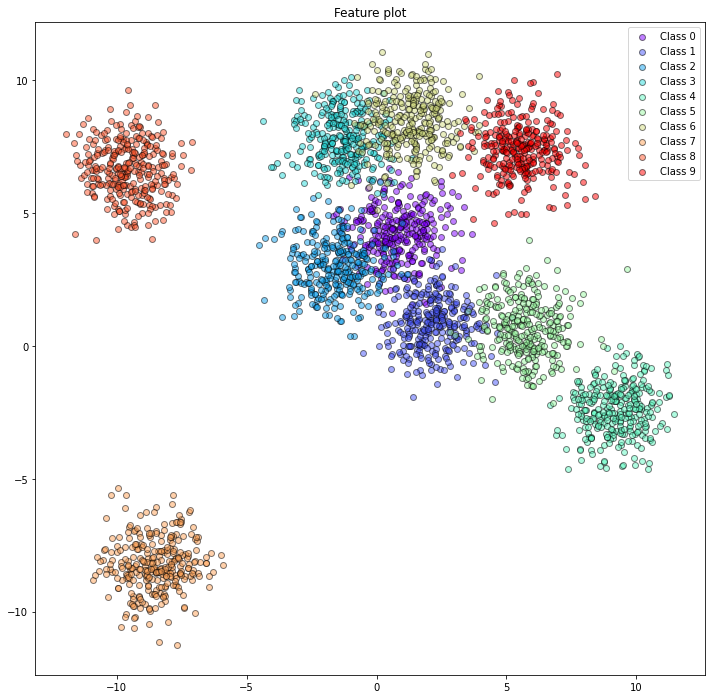

In [69]:
input_feature_df=pd.DataFrame(x)
output_df=pd.DataFrame(output)

fig, ax = plt.subplots(figsize=(12,12))
y_unique = np.unique(output_df)
colors = cm.rainbow(np.linspace(0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = input_feature_df[output_df == this_y]
    # this_sw = sw_train[y_train == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], c=color,
                alpha=0.5, edgecolor='k',
                label="Class %s" % this_y)

plt.legend(loc="best")
plt.title("Feature plot")